### Test Model 1 with Simulated Annealing Technique implemented

In [1]:
import os
import sys
from railway import *
from gurobipy import GRB
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
	style="whitegrid",
	palette="tab10",
	rc={
		"grid.linestyle": "--",
		"grid.color": "gray",
		"grid.alpha": 0.3,
		"grid.linewidth": 0.5,
	},
)

# Set the current directory to root directory
os.chdir("/home/marco/railway-scheduling")
sys.path.append(os.getcwd())
print(f"Current working directory: 📂 {os.getcwd()}")

Current working directory: 📂 /home/marco/railway-scheduling


In [2]:
# Import model from dataset
N = 10
T = 10
J = 80
P = 2000
K = 3
FILENAME = f"datasets/railway_N{N}_T{T}_J{J}_P{P}_K{K}.json"
rail = Railway.load(FILENAME)
rail.model.setParam('TimeLimit', 60)
rail.set_constraints()
rail.set_objective()

print(rail)

Set parameter Username
Set parameter LicenseID to value 2585388
Academic license - for non-commercial use only - expires 2025-11-15
Set parameter TimeLimit to value 60
Railway scheduling problem

Parameters:
N:  10 stations
T:  10 periods
J:  80 jobs
P:  2000 passengers
K:  3 alternative routes
Aj: 80 jobs with arcs
Ja: 37 arcs with jobs
C:  0 arcs unavailable simultaneously

Optimization model:
Variables:   0
Constraints: 0
Objective:   0.0
Status:      LOADED



In [3]:
# Generate an initial solution
S = rail.generate_initial_solution()
print(S)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 1, 14: 1, 15: 2, 16: 3, 17: 1, 18: 1, 19: 3, 20: 1, 21: 1, 22: 3, 23: 1, 24: 1, 25: 3, 26: 1, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 3, 35: 2, 36: 5, 37: 2, 38: 2, 39: 2, 40: 5, 41: 2, 42: 3, 43: 4, 44: 1, 45: 1, 46: 3, 47: 2, 48: 3, 49: 5, 50: 3, 51: 7, 52: 3, 53: 1, 54: 7, 55: 1, 56: 1, 57: 5, 58: 1, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 9, 65: 7, 66: 1, 67: 2, 68: 2, 69: 2, 70: 3, 71: 4, 72: 3, 73: 2, 74: 3, 75: 2, 76: 5, 77: 4, 78: 6, 79: 1, 80: 2}


In [4]:
# Generate an alternative solution and see the diferences with initial one
Snew = rail.generate_neighbor_solution(S)
print("S\t", S)
print("Snew\t", Snew)

Snew2 = rail.generate_neighbor_solution(Snew)
print("Snew2\t", Snew2)

print("\nDifferences:")
for job in S:
	if S[job] != Snew[job]:
		print("job\tS -> Snew")
		print(f"{job}:\t{S[job]} -> {Snew[job]}")
		
if S == Snew:
	print("WARNING! No differences found!")

print()
 
for job in Snew:
	if Snew[job] != Snew2[job]:
		print("job\tSnew -> Snew2")
		print(f"{job}:\t{Snew[job]} -> {Snew2[job]}")
  
if Snew == Snew2:
	print("WARNING! No differences found!")

S	 {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 1, 14: 1, 15: 2, 16: 3, 17: 1, 18: 1, 19: 3, 20: 1, 21: 1, 22: 3, 23: 1, 24: 1, 25: 3, 26: 1, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 3, 35: 2, 36: 5, 37: 2, 38: 2, 39: 2, 40: 5, 41: 2, 42: 3, 43: 4, 44: 1, 45: 1, 46: 3, 47: 2, 48: 3, 49: 5, 50: 3, 51: 7, 52: 3, 53: 1, 54: 7, 55: 1, 56: 1, 57: 5, 58: 1, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 9, 65: 7, 66: 1, 67: 2, 68: 2, 69: 2, 70: 3, 71: 4, 72: 3, 73: 2, 74: 3, 75: 2, 76: 5, 77: 4, 78: 6, 79: 1, 80: 2}
Snew	 {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 1, 14: 1, 15: 2, 16: 3, 17: 1, 18: 1, 19: 3, 20: 1, 21: 1, 22: 3, 23: 1, 24: 1, 25: 3, 26: 1, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 3, 35: 2, 36: 5, 37: 2, 38: 2, 39: 2, 40: 5, 41: 2, 42: 3, 43: 4, 44: 1, 45: 1, 46: 9, 47: 2, 48: 3, 49: 5, 50: 3, 51: 7, 52: 3, 53: 1, 54: 7, 55: 1, 56: 1, 57: 5, 58: 1, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 9,

In [5]:
# Get decision variables for both solutions
y, x, h, w, v = rail.get_vars_from_times(S)
ynew, xnew, hnew, wnew, vnew = rail.get_vars_from_times(Snew)
ynew2, xnew2, hnew2, wnew2, vnew2 = rail.get_vars_from_times(Snew2)

# Evaluate objective function on both solutions
print("Objective function:")
print(f"Initial solution:\t{rail.get_objective_value(v)}")
print(f"Alternative solution:\t{rail.get_objective_value(vnew)}")
print(f"Alternative solution 2:\t{rail.get_objective_value(vnew2)}")

Objective function:
Initial solution:	33982.51970519358
Alternative solution:	33981.822184289995
Alternative solution 2:	33615.449721742974


Final solution with SA:	18772.85544380728


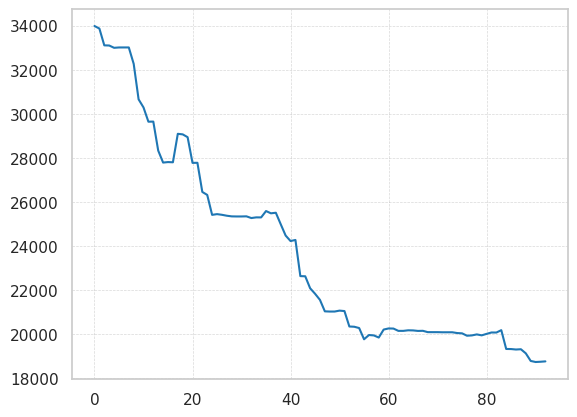

In [6]:
# Try SA algorithm to see if it improves initial solution

# Inputs
T = 1000
c = 0.99
L = 1
max_iter = 100

# Initialize solution and iteration counter
S = rail.generate_initial_solution()
_, _, _, _, v = rail.get_vars_from_times(S)
f_values = [rail.get_objective_value(v)]

iter = 0

# SA algorithm
while (T > 1e-6) and (iter < max_iter):
	for _ in range(L):
		# Generate a new solution
		S_new = rail.generate_neighbor_solution(S)

		# Get the solutions' variables
		_, _, _, _, v = rail.get_vars_from_times(S)
		_, _, _, _, v_new = rail.get_vars_from_times(S_new)

		# Compute the objective function values
		f = rail.get_objective_value(v)
		f_new = rail.get_objective_value(v_new)

		# Accept solution if it's better or with a certain probability
		if f_new <= f:
			S = S_new
			f_values.append(f_new)
		else:
			p = np.exp((f - f_new) / T)
			if np.random.rand() < p:
				S = S_new
				f_values.append(f_new)

	# Cool down the temperature
	T *= c

	# Increment the iteration counter
	iter += 1
 
 # Final solution with SA
print(f"Final solution with SA:\t{f_values[-1]}")
 
 # Plot f_values with time
plt.plot(f_values)

In [7]:
# Optimize the model
# rail.model.setParam('outputFlag', 0) # Avoid verbose output 
rail.optimize()

# Print optimal solution
print(f"Final solution with SA:\t{f_values[-1]}")
print(f"Optimal solution:\t{rail.model.getObjective().getValue()}")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  60

Optimize a model with 8285 rows, 5700 columns and 24727 nonzeros
Model fingerprint: 0x6c85c40f
Variable types: 1450 continuous, 4250 integer (4250 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+06]
  Objective range  [1e+03, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [9e-02, 1e+06]
Presolve removed 5806 rows and 3956 columns
Presolve time: 0.18s
Presolved: 2479 rows, 1744 columns, 9503 nonzeros
Variable types: 380 continuous, 1364 integer (1364 binary)
Found heuristic solution: objective 24605.834389

Root relaxation: objective 8.399367e+03, 1337 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  D

In [ ]:
# New model
rail2 = Railway.load(FILENAME)
rail2.model.setParam('TimeLimit', 60)
# rail2.model.setParam('outputFlag', 0) # Avoid verbose output

# Set model variables `Start` to SA solution
y, x, h, w, v = rail2.get_vars_from_times(S)
rail2.set_start(y, x, h, w, v)

# Update the model to actually set the variables
rail2.model.update()

# Set constraints and objective
rail2.set_constraints()
rail2.set_objective()

# Print initial objective value
objective_value = sum(
	sum(
		rail2.phi[o, d, t] * (rail2.v[o, d, t].start - rail2.Omega[o, d])
		for t in rail2.T
	)
	for o, d in rail2.OD
)

print(f"Final solution with SA:\t{f_values[-1]}")
print(f"Start objective value:\t{objective_value}")

# Optimize the model
rail2.optimize()

Set parameter TimeLimit to value 60
Final solution with SA:	18772.85544380728
Start objective value:	18772.85544380728
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  60

Optimize a model with 8285 rows, 5700 columns and 24727 nonzeros
Model fingerprint: 0xae919de6
Variable types: 1450 continuous, 4250 integer (4250 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+06]
  Objective range  [1e+03, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [9e-02, 1e+06]

User MIP start produced solution with objective 18772.9 (0.01s)
Loaded user MIP start with objective 18772.9

Presolve removed 5806 rows and 3956 columns
Presolve time: 0.16s
Presolved: 2479 rows, 1744 columns, 9503 nonzeros
Found heuristic solution: objective 17228.018235
Variable types:

In [9]:
# Check start for all variables

# y
for j in rail2.J:
	for t in rail2.T:
		if rail2.y[j, t].start != y[j, t]:
			print(f"j: {j}, t: {t}, values: y[{j}, {t}]: {y[j, t]} -> {rail2.y[j, t].start}")

# x
for a in rail2.A:
	for t in rail2.T:
		if rail2.x[*a, t].start != x[a, t]:
			print(f"a: {a}, t: {t}, values: x[{a}, {t}]: {x[a, t]} -> {rail2.x[*a, t].start}")
   
# h
for o, d in rail2.OD:
	for t in rail2.T:
		for i in range(1, rail2.K + 1):
			if rail2.h[o, d, t, i].start != h[o, d, t, i]:
				print(f"o: {o}, d: {d}, t: {t}, i: {i}, values: h[{o}, {d}, {t}, {i}]: {h[o, d, t, i]} -> {rail2.h[o, d, t, i].start}")
	
# w
for a in rail2.A:
	for t in rail2.T:
		if rail2.w[*a, t].start != w[a, t]:
			print(f"a: {a}, t: {t}, values: w[{a}, {t}]: {w[a, t]} -> {rail2.w[*a, t].start}")
   
# v
for o, d in rail2.OD:
	for t in rail2.T:
		if rail2.v[o, d, t].start != v[o, d, t]:
			print(f"o: {o}, d: {d}, t: {t}, values: v[{o}, {d}, {t}]: {v[o, d, t]} -> {rail2.v[o, d, t].start}")